In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [315]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [316]:
Data_raw = pd.read_excel("/content/drive/MyDrive/Curated data_1234 datapoints.xlsx")
Data = Data_raw.drop_duplicates()

In [317]:
Data.head()

,STY [mgMeOH h-1 gcat-1],Family,Metal Loading [wt.%],CR Metal [pm],Support 1,MW Support 1 [g mol-1],Name of Support2,MW of Support 2 [g mol-1],Name of Support 3,MW Support 3 [g mol-1],...,Calcination Temperature [K],Calcination duration [h],SBET [m2 g-1],H2/CO2 [-],GHSV [cm3 h-1 gcat-1],Catalyst amount [g],Pressure [Mpa],Temperature [K],Support [%wt],Reference DOI
0,2620.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,623,2.0,9.0,10.0,115500.0,0.50,6.0,598.0,88.6,DOI: 10.1126/sciadv.abi6012
1,2400.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,623,2.0,9.0,8.0,94500.0,0.50,6.0,598.0,88.6,DOI: 10.1126/sciadv.abi6012
2,2233.6,Cu,36.5,138,ZnO,81.38,0,0,SBA-15,60.0,...,573,4.0,218.0,3.0,120000.0,0.02,4.0,453.0,60.8,https://doi.org/10.1016/j.ijhydene.2018.03.202
3,2230.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,623,2.0,9.0,10.0,115500.0,0.50,4.0,598.0,88.6,DOI: 10.1126/sciadv.abi6012
4,2224.0,Cu,36.5,138,ZnO,81.38,SBA-15,60,0,0.0,...,773,5.0,218.0,3.0,60000.0,0.04,4.0,453.0,60.8,https://doi.org/10.1016/j.jiec.2017.12.053


In [318]:
Data.describe()

,STY [mgMeOH h-1 gcat-1],Metal Loading [wt.%],CR Metal [pm],MW Support 1 [g mol-1],MW Support 3 [g mol-1],Total MW of Support [g mol-1],Promoter 1 loading [wt.%],Promoter 2 loading [wt.%],Calcination Temperature [K],Calcination duration [h],SBET [m2 g-1],H2/CO2 [-],GHSV [cm3 h-1 gcat-1],Catalyst amount [g],Pressure [Mpa],Temperature [K],Support [%wt]
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1168.000000,1230.000000,1230.000000,1230.000000
mean,193.516881,38.285200,138.843902,80.034813,5.862667,113.991967,2.411902,0.128244,691.639024,3.576016,104.125236,3.694797,13384.966500,0.514075,3.917886,528.776214,59.174654
std,285.731909,34.942268,3.798208,57.068582,27.765722,88.063794,4.892302,0.748877,83.804005,1.035631,105.777758,1.911084,13630.109621,0.673314,4.279412,43.293931,34.421342
min,0.737274,0.000000,131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,573.000000,2.000000,2.000000,1.000000,900.000000,0.000000,0.100000,433.000000,-5.100000
25%,37.329000,9.000000,138.000000,60.000000,0.000000,40.110000,0.000000,0.000000,623.000000,3.000000,38.475000,3.000000,4800.000000,0.200000,3.000000,503.000000,39.200000
50%,98.130112,24.000000,138.000000,81.380000,0.000000,101.960000,0.000000,0.000000,673.000000,3.250000,81.000000,3.000000,10000.000000,0.500000,3.000000,523.000000,72.000000
75%,240.271516,58.775000,144.000000,101.960000,0.000000,183.340000,4.200000,0.000000,773.000000,4.000000,133.000000,3.800000,18000.000000,0.500000,5.000000,553.000000,87.600000
max,2620.000000,100.000000,144.000000,277.640000,248.000000,501.500000,57.000000,7.140000,973.000000,7.000000,1102.000000,20.000000,120000.000000,5.000000,36.000000,673.000000,99.500000


In [319]:
Data.dtypes

,0
STY [mgMeOH h-1 gcat-1],float64
Family,object
Metal Loading [wt.%],float64
CR Metal [pm],int64
Support 1,object
MW Support 1 [g mol-1],float64
Name of Support2,object
MW of Support 2 [g mol-1],object
Name of Support 3,object
MW Support 3 [g mol-1],float64


The MW of Support 2 [g mol-1] column is not represented as numeric.

In [320]:
print(Data.columns)

Index(['STY [mgMeOH h-1 gcat-1]', 'Family ', ' Metal Loading [wt.%]',
       'CR Metal [pm]', ' Support 1', 'MW Support 1 [g mol-1]',
       'Name of Support2', 'MW of Support 2 [g mol-1]', 'Name of Support 3',
       'MW Support 3 [g mol-1]', 'Total MW of Support [g mol-1]',
       ' Promoter 1', 'Promoter 1 loading [wt.%]', 'Promoter 2',
       'Promoter 2 loading [wt.%]', 'Calcination Temperature [K]',
       'Calcination duration [h]', 'SBET [m2 g-1]', 'H2/CO2 [-]',
       'GHSV [cm3 h-1 gcat-1]', 'Catalyst amount [g]', 'Pressure [Mpa]',
       'Temperature [K]', 'Support [%wt]', 'Reference DOI'],
      dtype='object')


In [321]:
column_MWS2 = Data['MW of Support 2 [g mol-1]']
numeric_column_MWS2 = pd.to_numeric(column_MWS2, errors='coerce')
non_numeric_values = column_MWS2[numeric_column_MWS2.isna()]
display(non_numeric_values)
column_MWS2.loc[non_numeric_values.index] = 0
column_MWS2 = pd.to_numeric(column_MWS2)

,MW of Support 2 [g mol-1]
83,Al2o3
194,Al2o3


/tmp/ipython-input-1394017928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_MWS2.loc[non_numeric_values.index] = 0


In [322]:
Data[" MW of Support 2 [g mol-1]"] = column_MWS2

/tmp/ipython-input-3597805731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[" MW of Support 2 [g mol-1]"] = column_MWS2


Unit conversion

In [323]:
y = Data["STY [mgMeOH h-1 gcat-1]"]/1000

separating the numeric columns for analysis

In [324]:
Data_numeric = Data.select_dtypes(include='number')
Data_numeric.head()

,STY [mgMeOH h-1 gcat-1],Metal Loading [wt.%],CR Metal [pm],MW Support 1 [g mol-1],MW Support 3 [g mol-1],Total MW of Support [g mol-1],Promoter 1 loading [wt.%],Promoter 2 loading [wt.%],Calcination Temperature [K],Calcination duration [h],SBET [m2 g-1],H2/CO2 [-],GHSV [cm3 h-1 gcat-1],Catalyst amount [g],Pressure [Mpa],Temperature [K],Support [%wt],MW of Support 2 [g mol-1]
0,2620.0,4.4,144,159.69,0.0,159.69,6.8,0.2,623,2.0,9.0,10.0,115500.0,0.50,6.0,598.0,88.6,0.0
1,2400.0,4.4,144,159.69,0.0,159.69,6.8,0.2,623,2.0,9.0,8.0,94500.0,0.50,6.0,598.0,88.6,0.0
2,2233.6,36.5,138,81.38,60.0,141.38,2.7,0.0,573,4.0,218.0,3.0,120000.0,0.02,4.0,453.0,60.8,0.0
3,2230.0,4.4,144,159.69,0.0,159.69,6.8,0.2,623,2.0,9.0,10.0,115500.0,0.50,4.0,598.0,88.6,0.0
4,2224.0,36.5,138,81.38,0.0,141.38,2.7,0.0,773,5.0,218.0,3.0,60000.0,0.04,4.0,453.0,60.8,60.0


check for null values

In [325]:
print(Data_numeric.isnull().sum())

STY [mgMeOH h-1 gcat-1]           0
 Metal Loading [wt.%]             0
CR Metal [pm]                     0
MW Support 1 [g mol-1]            0
MW Support 3 [g mol-1]            0
Total MW of Support [g mol-1]     0
Promoter 1 loading [wt.%]         0
Promoter 2 loading [wt.%]         0
Calcination Temperature [K]       0
Calcination duration [h]          0
SBET [m2 g-1]                     0
H2/CO2 [-]                        0
GHSV [cm3 h-1 gcat-1]             0
Catalyst amount [g]              62
Pressure [Mpa]                    0
Temperature [K]                   0
Support [%wt]                     0
 MW of Support 2 [g mol-1]        0
dtype: int64


replace the null values by mode

In [326]:
Data_numeric['Catalyst amount [g]'] = Data_numeric['Catalyst amount [g]'].fillna(Data_numeric['Catalyst amount [g]'].mode()[0])

In [327]:
sty_corr = Data_numeric.corr()["STY [mgMeOH h-1 gcat-1]"].sort_values(ascending=False)
print(sty_corr)

STY [mgMeOH h-1 gcat-1]          1.000000
GHSV [cm3 h-1 gcat-1]            0.671879
H2/CO2 [-]                       0.232700
CR Metal [pm]                    0.178361
Temperature [K]                  0.172520
 Metal Loading [wt.%]            0.140629
Promoter 1 loading [wt.%]        0.108650
 MW of Support 2 [g mol-1]       0.053452
Pressure [Mpa]                   0.016263
SBET [m2 g-1]                   -0.018216
MW Support 3 [g mol-1]          -0.021647
MW Support 1 [g mol-1]          -0.026378
Calcination Temperature [K]     -0.038517
Total MW of Support [g mol-1]   -0.047509
Promoter 2 loading [wt.%]       -0.074249
Catalyst amount [g]             -0.080485
Calcination duration [h]        -0.094676
Support [%wt]                   -0.156584
Name: STY [mgMeOH h-1 gcat-1], dtype: float64


In [328]:
X = Data_numeric.drop(columns=["STY [mgMeOH h-1 gcat-1]", ' MW of Support 2 [g mol-1]','MW Support 1 [g mol-1]', 'MW Support 3 [g mol-1]', 'Total MW of Support [g mol-1]' ])

In [329]:
print(X.isnull().sum())

 Metal Loading [wt.%]          0
CR Metal [pm]                  0
Promoter 1 loading [wt.%]      0
Promoter 2 loading [wt.%]      0
Calcination Temperature [K]    0
Calcination duration [h]       0
SBET [m2 g-1]                  0
H2/CO2 [-]                     0
GHSV [cm3 h-1 gcat-1]          0
Catalyst amount [g]            0
Pressure [Mpa]                 0
Temperature [K]                0
Support [%wt]                  0
dtype: int64


In [330]:
X.head()

,Metal Loading [wt.%],CR Metal [pm],Promoter 1 loading [wt.%],Promoter 2 loading [wt.%],Calcination Temperature [K],Calcination duration [h],SBET [m2 g-1],H2/CO2 [-],GHSV [cm3 h-1 gcat-1],Catalyst amount [g],Pressure [Mpa],Temperature [K],Support [%wt]
0,4.4,144,6.8,0.2,623,2.0,9.0,10.0,115500.0,0.50,6.0,598.0,88.6
1,4.4,144,6.8,0.2,623,2.0,9.0,8.0,94500.0,0.50,6.0,598.0,88.6
2,36.5,138,2.7,0.0,573,4.0,218.0,3.0,120000.0,0.02,4.0,453.0,60.8
3,4.4,144,6.8,0.2,623,2.0,9.0,10.0,115500.0,0.50,4.0,598.0,88.6
4,36.5,138,2.7,0.0,773,5.0,218.0,3.0,60000.0,0.04,4.0,453.0,60.8


We're taking 1141 rows for the model, as the other rows were performed on the lab for validation as noted on the paper.

In [331]:
X = X.iloc[:1141]
print(X.shape)
y = y.iloc[:1141]
print(y.shape)

(1141, 13)
(1141,)


In [332]:
X.tail()

,Metal Loading [wt.%],CR Metal [pm],Promoter 1 loading [wt.%],Promoter 2 loading [wt.%],Calcination Temperature [K],Calcination duration [h],SBET [m2 g-1],H2/CO2 [-],GHSV [cm3 h-1 gcat-1],Catalyst amount [g],Pressure [Mpa],Temperature [K],Support [%wt]
1140,100.0,144,0.0,0.0,623,3.0,37.0,3.0,6000.0,0.2,0.1,523.0,0.0
1141,97.0,140,3.0,0.0,773,3.0,48.0,3.0,24000.0,0.5,5.0,593.0,0.0
1142,94.0,140,6.0,0.0,773,3.0,48.0,3.0,24000.0,0.5,5.0,593.0,0.0
1143,91.0,140,9.0,0.0,773,3.0,48.0,3.0,24000.0,0.5,5.0,593.0,0.0
1144,88.0,140,12.0,0.0,773,3.0,48.0,3.0,24000.0,0.5,5.0,593.0,0.0


Random forest model with default parameters

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

default_model = RandomForestRegressor(random_state=2)
default_model.fit(X_train, y_train)

y_train_pred = default_model.predict(X_train)
y_test_pred = default_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)
rmse     = np.sqrt(mean_squared_error(np.concatenate([y_train, y_test]),
                              np.concatenate([y_train_pred, y_test_pred])))

print("Training R2:", r2_train)
print("Test R2:", r2_test)
print("RMSE:", rmse)

Training R2: 0.9754702496202549
Test R2: 0.9333636499438239
RMSE: 0.04812174973483707


Test accuracies for default model.

In [334]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = default_model, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 76.98 %


Tuning parameters using GridSearchCV

In [335]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
model = RandomForestRegressor(random_state=2)

param_grid = { 'n_estimators': np.arange(100, 501, 100), 'max_depth': [20, 40, None],
              'max_features': ['sqrt'], 'min_samples_split': [2, 4] }

tuning = GridSearchCV( estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1 )

tuning.fit(X_train, y_train)

print(tuning.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': np.int64(500)}


utilizing tuned parameters for RF

In [342]:
RF = RandomForestRegressor(
    n_estimators=500,
    max_depth=40,
    max_features='sqrt',
    min_samples_split=2,
    bootstrap=True,
    random_state=2,
)

RF.fit(X_train, y_train)


RandomForestRegressor(max_depth=40, max_features='sqrt', n_estimators=500,
                      random_state=2)

In [343]:
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)
rmse     = np.sqrt(mean_squared_error(np.concatenate([y_train, y_test]),
                              np.concatenate([y_train_pred, y_test_pred])))

print("Training R2:", r2_train)
print("Test R2:", r2_test)
print("RMSE:", rmse)

Training R2: 0.9751051554570841
Test R2: 0.9173566930921226
RMSE: 0.05338505569938919


In [344]:
accuracies = cross_val_score(estimator = RF, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 80.36 %


Accuracy is greater than 80%

Now we proceed to the plot

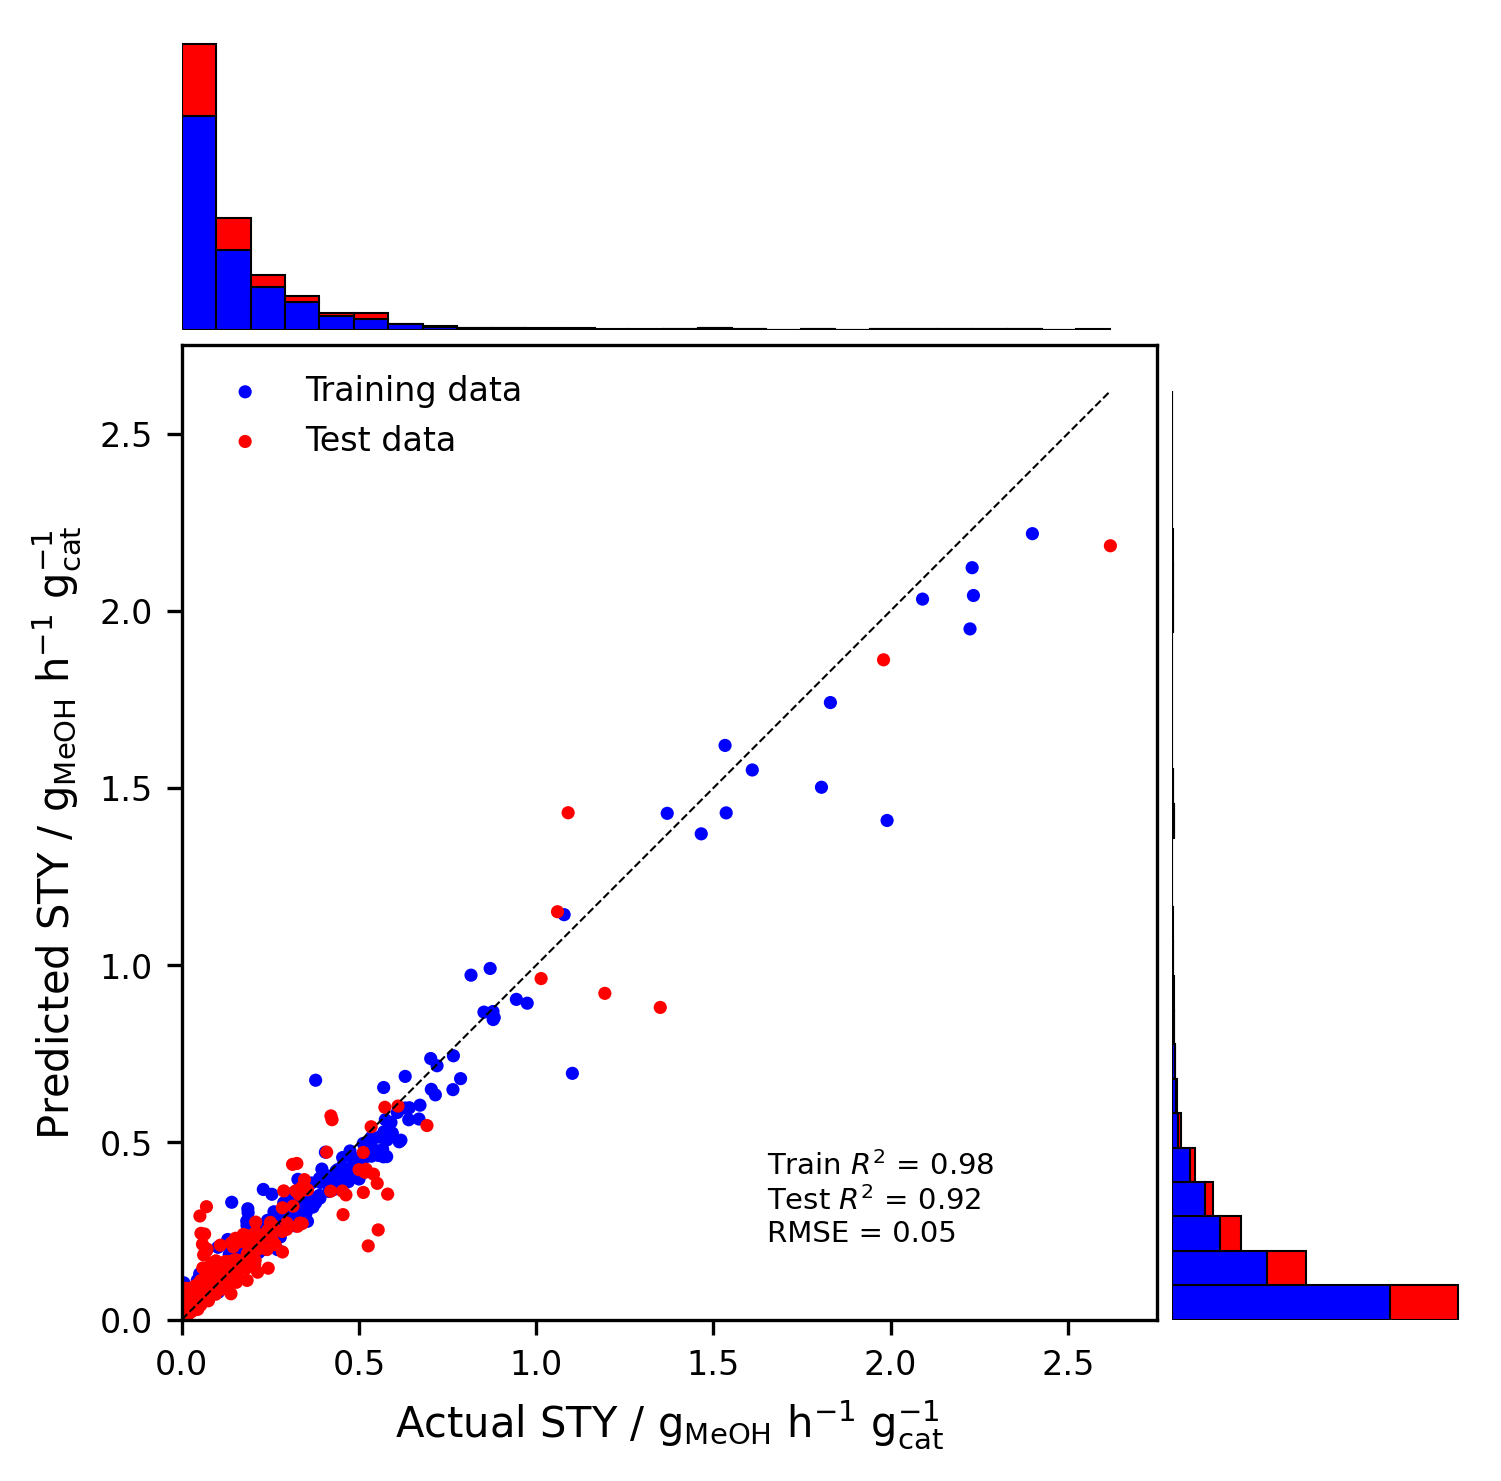

In [346]:
fig = plt.figure(figsize=(5, 5), dpi=300)
left, bottom = 0, 0
main_w, main_h = 0.65, 0.65
pad = 0.01
ax = fig.add_axes([left, bottom, main_w, main_h])
ax_histx = fig.add_axes([left, bottom + main_h + pad, main_w, 0.2])
ax_histy = fig.add_axes([left + main_w + pad, bottom, 0.2, main_h])

ax.scatter(y_train, y_train_pred, s=10, alpha=1, label="Training data", color='blue', edgecolor='none')
ax.scatter(y_test,  y_test_pred,  s=10, alpha=1, label="Test data",     color='red',  edgecolor='none')

all_values = np.concatenate([y_train, y_test, y_train_pred, y_test_pred])
min_val = 0.0
max_val = np.max(all_values)
ax.plot([min_val, max_val], [min_val, max_val], "k--", linewidth=0.5)

ax.set_xlabel(r"Actual STY / g$_{\mathrm{MeOH}}$ h$^{-1}$ g$_{\mathrm{cat}}^{-1}$")
ax.set_ylabel(r"Predicted STY / g$_{\mathrm{MeOH}}$ h$^{-1}$ g$_{\mathrm{cat}}^{-1}$")

ax.set_xlim(min_val, max_val + 0.05*(max_val-min_val))
ax.set_ylim(min_val, max_val + 0.05*(max_val-min_val))
ax.set_aspect('equal', adjustable='box')

bins = np.linspace(min_val, max_val, 28)
ax_histx.hist([y_train, y_test], bins=bins, stacked=True, color=['blue', 'red'], edgecolor='black', linewidth=0.5)
ax_histy.hist([y_train_pred, y_test_pred], bins=bins, stacked=True, orientation='horizontal',
              color=['blue', 'red'], edgecolor='black', linewidth=0.5)

ax_histx.set_xlim(ax.get_xlim())
ax_histx.axis('off')
ax_histy.set_ylim(ax.get_ylim())
ax_histy.axis('off')

txt = f"Train $R^2$ = {r2_train:.2f}\nTest $R^2$ = {r2_test:.2f}\nRMSE = {rmse:.2f}"
ax.text(0.60, 0.08, txt, transform=ax.transAxes, fontsize=7,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

ax.legend(frameon=False, loc='upper left', fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('fig_7_final.png', dpi=300, bbox_inches='tight')
plt.show()
